In [1]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

We will work on MNIST dataset.

In [2]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))
    ,])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/',
                          download=True, 
                          train=True,
                          transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=64,
                                          shuffle=True)

We have the training data loaded into `trainloader` and we make that an iterator with `iter(trainloader)`. Later, we'll use this to loop through the dataset for training, like

```python
for image, label in trainloader:
    ## do things with images and labels
```

You'll notice I created the `trainloader` with a batch size of 64, and `shuffle=True`. The batch size is the number of images we get in one iteration from the data loader and pass through our network, often called a *batch*. And `shuffle=True` tells it to shuffle the dataset every time we start going through the data loader again. But here I'm just grabbing the first batch so we can check out the data. We can see below that `images` is just a tensor with size `(64, 1, 28, 28)`. So, 64 images per batch, 1 color channel, and 28x28 images.

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


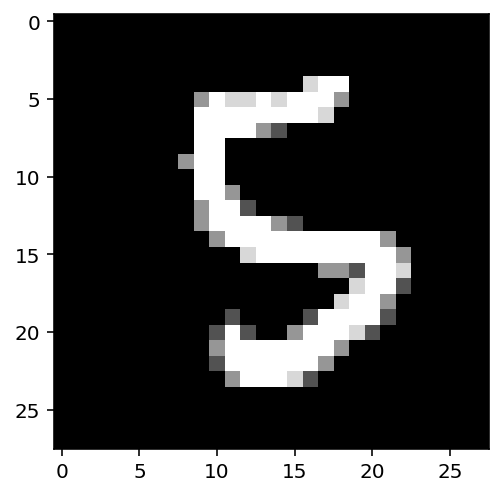

In [4]:
# this is what one of the images looks like
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

**Exercise**

Flatten the batch of images. Then build a multi-layer network with 784 input units, 256 hidden units, and 10 output units using random tensors for the weights and biases. Use a sigmoid for the hidden layer. Leave the output layer without an activation.

In [5]:
def activation(x):
    """
    Sigmoid activation function
    
    Arguments:
    ----------
    x: torch.Tensor
    """
    return 1/(1 + torch.exp(-x))

In [6]:
# Set seed
torch.manual_seed(7)

new_images = images.view(images.shape[0], images.shape[2]* images.shape[3])
#new_images = images.view(images.shape[0], -1)

n_input = new_images.shape[1]
n_hidden = 256
n_output = 10

# Weights for inputs  to hidden layer
W1 = torch.randn(n_input, n_hidden)
# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

# output of this network, should have shape (64,10)
# out = 
hidden_output = activation(torch.mm( new_images, W1) + B1)

final_output = torch.mm(hidden_output, W2) + B2
print(final_output)

tensor([[-1.5501e+01, -6.2225e+00, -2.0410e+00, -5.7955e+00,  5.1170e+00,
          2.6277e+00, -5.5344e+00, -4.5349e+00, -1.1088e+01, -1.0660e-01],
        [-1.0459e+01, -8.9736e+00,  7.7845e-01, -2.2818e+00,  1.3991e+01,
          7.3920e+00, -1.9095e+00, -5.0793e+00, -9.5725e+00, -1.6327e+01],
        [-2.1206e+01, -1.3151e+01, -5.6795e-01,  2.5531e+00,  1.6527e+01,
          2.6351e+00, -4.6944e+00, -6.8836e+00, -7.1417e+00, -6.3762e+00],
        [-6.3748e+00, -4.9577e+00, -6.9053e-01, -1.3758e+01, -2.4457e+00,
          1.2309e+01, -4.1845e+00,  3.8132e+00, -8.3046e+00, -3.7871e+00],
        [-1.3423e+01, -7.4862e+00, -2.3396e+00, -1.4249e+01,  5.3565e+00,
          5.0829e+00,  1.5803e+00,  9.6535e+00, -1.0857e+01, -5.5987e-02],
        [-1.9427e+01, -1.0932e+00,  5.1802e+00, -8.6186e+00,  8.1895e+00,
          5.4424e-01, -1.3049e+01, -5.7129e+00, -1.3239e+01, -9.6769e+00],
        [-2.0367e+01, -1.3249e-01,  2.7264e+00, -6.8318e+00,  1.1669e+00,
          6.2121e+00,  2.2096e+0

In [7]:
final_output.shape

torch.Size([64, 10])

> **Exercise:** Implement a function `softmax` that performs the softmax calculation and returns probability distributions for each example in the batch. Note that you'll need to pay attention to the shapes when doing this. If you have a tensor `a` with shape `(64, 10)` and a tensor `b` with shape `(64,)`, doing `a/b` will give you an error because PyTorch will try to do the division across the columns (called broadcasting) but you'll get a size mismatch. The way to think about this is for each of the 64 examples, you only want to divide by one value, the sum in the denominator. So you need `b` to have a shape of `(64, 1)`. This way PyTorch will divide the 10 values in each row of `a` by the one value in each row of `b`. Pay attention to how you take the sum as well. You'll need to define the `dim` keyword in `torch.sum`. Setting `dim=0` takes the sum across the rows while `dim=1` takes the sum across the columns.

In [8]:
def softmax(x):
    # Implement here
    denominator = torch.exp(x).sum(dim=1)
    return torch.exp(x) / denominator.view(denominator.shape[0],1)
    # return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)
    
# Out should be the output of the network in the
# previous excercise with shape (64,10)
probabilities = softmax(final_output)

# should be (64,10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

# print probabilities
print(probabilities.sum(dim=0))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])
tensor([4.1733e-06, 2.9766e-02, 4.8854e+00, 5.2744e-03, 2.9954e+01, 2.1009e+01,
        1.1054e+00, 6.5788e+00, 1.6830e-05, 4.3289e-01])


# Building networks with PyTorch

In [9]:
from torch import nn

In [10]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units, one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of
        # our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [11]:
# Create the network and look at it's text
# representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

Let's go through this bit by bit.

```python
class Network(nn.Module):
```

Here we're inheriting from `nn.Module`. Combined with `super().__init__()` this creates a class that tracks the architecture and provides a lot of useful methods and attributes. It is mandatory to inherit from `nn.Module` when you're creating a class for your network. The name of the class itself can be anything.

```python
self.hidden = nn.Linear(784, 256)
```

This line creates a module for a linear transformation, $x\mathbf{W} + b$, with 784 inputs and 256 outputs and assigns it to `self.hidden`. The module automatically creates the weight and bias tensors which we'll use in the `forward` method. You can access the weight and bias tensors once the network (`net`) is created with `net.hidden.weight` and `net.hidden.bias`.

```python
self.output = nn.Linear(256, 10)
```

Similarly, this creates another linear transformation with 256 inputs and 10 outputs.

```python
self.sigmoid = nn.Sigmoid()
self.softmax = nn.Softmax(dim=1)
```

Here I defined operations for the sigmoid activation and softmax output. Setting `dim=1` in `nn.Softmax(dim=1)` calculates softmax across the columns.

```python
def forward(self, x):
```

PyTorch networks created with `nn.Module` must have a `forward` method defined. It takes in a tensor `x` and passes it through the operations you defined in the `__init__` method.

```python
x = self.hidden(x)
x = self.sigmoid(x)
x = self.output(x)
x = self.softmax(x)
```

Here the input tensor `x` is passed through each operation and reassigned to `x`. We can see that the input tensor goes through the hidden layer, then a sigmoid function, then the output layer, and finally the softmax function. It doesn't matter what you name the variables here, as long as the inputs and outputs of the operations match the network architecture you want to build. The order in which you define things in the `__init__` method doesn't matter, but you'll need to sequence the operations correctly in the `forward` method.

Now we can create a `Network` object.

Alternatively, we can use **torch.nn.functional** module

In [12]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

**Build a Network**

**Exercise**

Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activations.

It's good practice to name your layers by their type of network, for instance 'fc' to represent a fully-connected layer. As you code your solution, use `fc1`, `fc2`, and `fc3` as your layer names.

In [13]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer, linear transformation
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
        
    def forward(self, x):
        # fc1 layer with relu
        x = F.relu(self.fc1(x))
        # fc2 layer with relu
        x = F.relu(self.fc2(x))
        # output with softmax
        x = F.softmax(self.output(x), dim=1)
        
        return x

## Initializing weights and biases

The weights and such are automatically initialized for you, but it's possible to customize how they are initialized. The weights and biases are tensors attached to the layer you defined, you can get them with model.fc1.weight for instance.

In [14]:
model = Network()
print(model.fc1.weight)
print(model.fc2.bias)

Parameter containing:
tensor([[ 0.0019,  0.0005, -0.0266,  ...,  0.0021,  0.0257,  0.0180],
        [-0.0291,  0.0194,  0.0033,  ..., -0.0058, -0.0152, -0.0074],
        [-0.0255,  0.0141, -0.0173,  ..., -0.0066,  0.0269,  0.0035],
        ...,
        [-0.0114,  0.0222,  0.0197,  ...,  0.0243,  0.0304,  0.0111],
        [-0.0090, -0.0345, -0.0355,  ..., -0.0130,  0.0239, -0.0339],
        [ 0.0088,  0.0205,  0.0327,  ..., -0.0091,  0.0315,  0.0055]],
       requires_grad=True)
Parameter containing:
tensor([-0.0660,  0.0226,  0.0190, -0.0048,  0.0687,  0.0601,  0.0095,  0.0831,
        -0.0555,  0.0615,  0.0080, -0.0634, -0.0744,  0.0837, -0.0723, -0.0719,
        -0.0452,  0.0254, -0.0870, -0.0049, -0.0622,  0.0144, -0.0481, -0.0137,
        -0.0872,  0.0103, -0.0324, -0.0078,  0.0758,  0.0262,  0.0507, -0.0772,
        -0.0630,  0.0543, -0.0660, -0.0076, -0.0600, -0.0876, -0.0111, -0.0600,
         0.0067,  0.0650,  0.0283,  0.0037, -0.0137,  0.0008,  0.0788, -0.0840,
         0.0520

In [15]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
print(model.fc1.bias)

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)


In [17]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0013, -0.0097, -0.0107,  ...,  0.0088, -0.0066,  0.0040],
        [-0.0093,  0.0021,  0.0107,  ...,  0.0003,  0.0007,  0.0027],
        [ 0.0085, -0.0038,  0.0023,  ..., -0.0218, -0.0126,  0.0017],
        ...,
        [ 0.0034, -0.0230,  0.0046,  ...,  0.0049, -0.0056,  0.0109],
        [-0.0020,  0.0027, -0.0104,  ...,  0.0089, -0.0030,  0.0080],
        [ 0.0027,  0.0078, -0.0043,  ..., -0.0089,  0.0020,  0.0119]])

## Forward pass

In [18]:
# Grab some data
dataiter = iter(trainloader)
images, labels = dataiter.next()

images.resize_(64, 1, 784)

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]

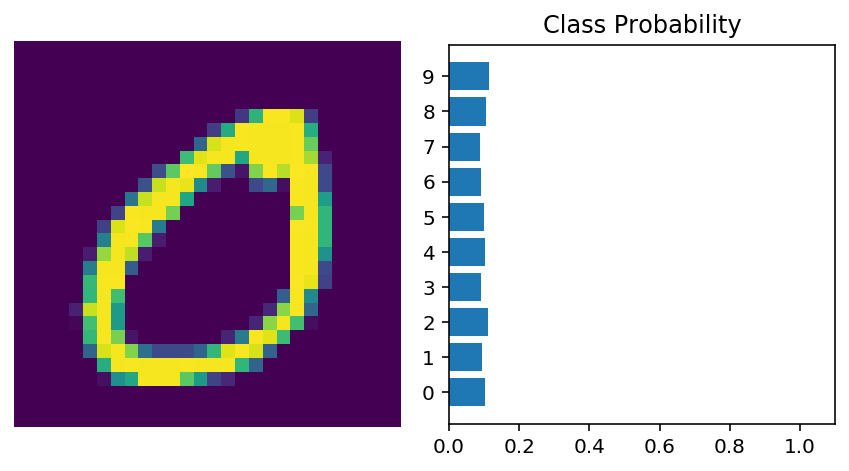

In [19]:
helper.view_classify(img.view(1, 28, 28), ps)

## Using nn.Sequential

It is an alternative way, as the 3rd option.

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


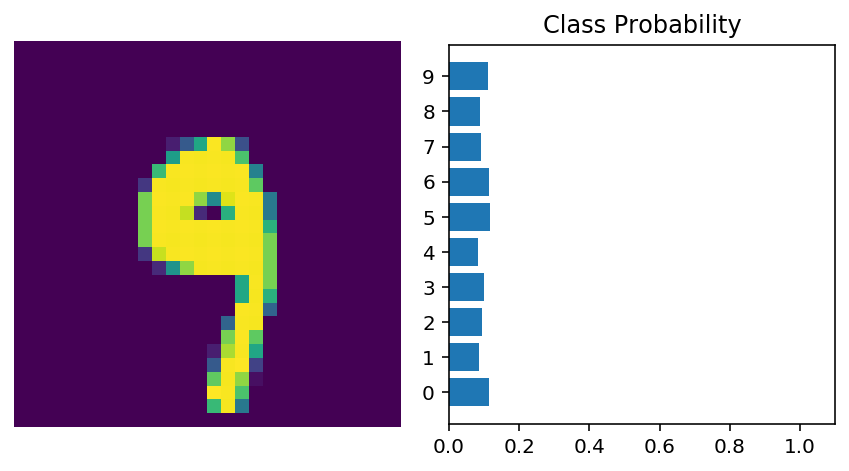

In [20]:
# Hyperparameters for our network
input_size = 784
hidden_size = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(
            nn.Linear(input_size, hidden_size[0]),
            nn.ReLU(),
            nn.Linear(hidden_size[0], hidden_size[1]),
            nn.ReLU(),
            nn.Linear(hidden_size[1], output_size),
            nn.Softmax(dim=1)
        )

print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [21]:
print(model[1])

ReLU()


The operations are available by passing in the appropriate index.

## Using nn.Sequential

PyTorch provides a convenient way to build networks like this where a tensor is passed sequentially through operations, nn.Sequential (documentation). Using this to build the equivalent network:

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


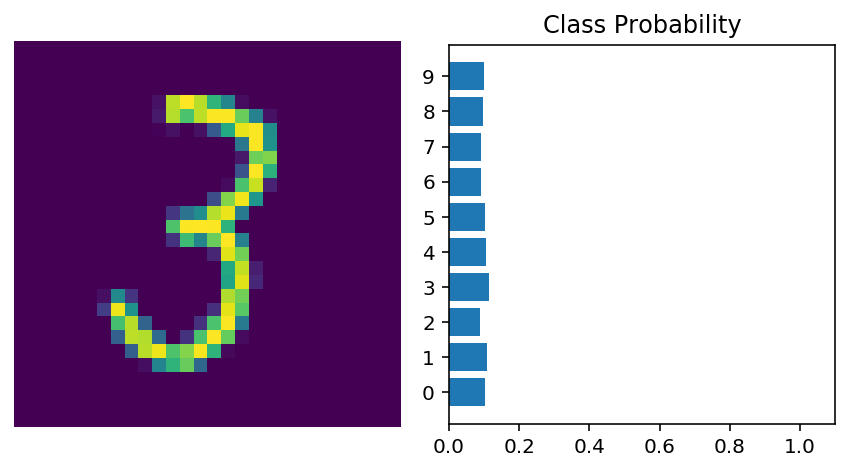

In [22]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [23]:
#For example, if you want to get first Linear operation and look at the weights, you'd use model[0].

print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[ 0.0260,  0.0241, -0.0119,  ...,  0.0023, -0.0341, -0.0346],
        [ 0.0145,  0.0296, -0.0237,  ...,  0.0150, -0.0257, -0.0052],
        [ 0.0072, -0.0236, -0.0258,  ...,  0.0087, -0.0317, -0.0225],
        ...,
        [ 0.0265, -0.0063,  0.0099,  ...,  0.0130, -0.0111,  0.0266],
        [ 0.0112, -0.0229,  0.0081,  ..., -0.0325, -0.0339,  0.0168],
        [ 0.0157,  0.0356,  0.0256,  ...,  0.0286, -0.0296, -0.0275]],
       requires_grad=True)

We can also pass in an *OrderedDict* to name the indiviual layers and operations. Note that dictionary keys must be unique.

In [24]:
from collections import OrderedDict

model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_size[0])),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(hidden_size[0], hidden_size[1])),
    ('relu2', nn.ReLU()),
    ('output', nn.Linear(hidden_size[1], output_size)),
    ('softmax', nn.Softmax(dim=1))
]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Now we can access layers either by integer or the name

In [25]:
print(model.fc1)
print(model[0])

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
